## Lesson 5: Object Oriented Programming

### Terms
* Class - A blueprint consisting of methods and attributes
* Object - an instance of class
* Attribute - characteristic
* Method - an action that a class or object could take
* OOP - object oriented programming
* Encapsulation - Encapsulation allows to hide implementation details 
* Modular Code: logically broken up into functions and modules. Made your code more organized, efficient, and reusable.
* Refactoring Code: restructuring your code to improve its internal structure, without changing its external functionality

### Best Practices

**Tip: Use meaningful names**
* Be descriptive and imply type - E.g. for booleans, you can prefix with is_ or has_ to make it clear it is a condition. You can also use part of speech to imply types, like verbs for functions and nouns for variables.
* Be consistent but clearly differentiate - E.g. age_list and age is easier to differentiate than ages and age.
* Avoid abbreviations and especially single letters - (Exception: counters and common math variables) Choosing when these exceptions can be made can be determined based on the audience for your code. If you work with other data scientists, certain variables may be common knowledge. While if you work with full stack engineers, it might be necessary to provide more descriptive names in these cases as well.
* Long names != descriptive names - You should be descriptive, but only with relevant information. E.g. good functions names describe what they do well without including details about implementation or highly specific uses.

**Tip: Use whitespace properly**
* Organize your code with consistent indentation - the standard is to use 4 spaces for each indent. You can make this a default in your text editor.
* Separate sections with blank lines to keep your code well organized and readable.
* Try to limit your lines to around 79 characters, which is the guideline given in the PEP 8 style guide. In many good text editors, there is a setting to display a subtle line that indicates where the 79 character limit is.

**Tip: DRY (Don't Repeat Yourself)**
* Don't repeat yourself! Modularization allows you to reuse parts of your code. Generalize and consolidate repeated code in functions or loops.

**Tip: Abstract out logic to improve readability**
* Abstracting out code into a function not only makes it less repetitive, but also improves readability with descriptive function names. Although your code can become more readable when you abstract out logic into functions, it is possible to over-engineer this and have way too many modules, so use your judgement.

**Tip: Minimize the number of entities (functions, classes, modules, etc.)**
* There are tradeoffs to having function calls instead of inline logic. If you have broken up your code into an unnecessary amount of functions and modules, you'll have to jump around everywhere if you want to view the implementation details for something that may be too small to be worth it. Creating more modules doesn't necessarily result in effective modularization.

**Tip: Functions should do one thing**
* Each function you write should be focused on doing one thing. If a function is doing multiple things, it becomes more difficult to generalize and reuse. Generally, if there's an "and" in your function name, consider refactoring.

**Tip: Arbitrary variable names can be more effective in certain functions**
* Arbitrary variable names in general functions can actually make the code more readable.

**Tip: Try to use fewer than three arguments per function**
* Try to use no more than three arguments when possible. This is not a hard rule and there are times it is more appropriate to use many parameters. But in many cases, it's more effective to use fewer arguments. Remember we are modularizing to simplify our code and make it more efficient to work with. If your function has a lot of parameters, you may want to rethink how you are splitting this up.

**Unit Test/Integration Test** 
* The advantage of unit tests is that they are isolated from the rest of your program, and thus, no dependencies are involved. They don't require access to databases, APIs, or other external sources of information. However, passing unit tests isn’t always enough to prove that our program is working successfully. To show that all the parts of our program work with each other properly, communicating and transferring data between them correctly, we use integration tests. In this lesson, we'll focus on unit tests; however, when you start building larger programs, you will want to use integration tests as well.

### Instance, class, static methods

In [317]:
class MyClass:
    
    #class attribute
    msg = 'This is a class attribute'
    
    def __init__(self, n = 10):
        
        self.n = n
        
    # instance method
    def method(self):
        return 'instance method called', self

    @classmethod
    def classmethod(cls):
        return 'class method called', cls

    @staticmethod
    def staticmethod():
        return 'static method called'

In [320]:
MyClass.msg

'This is a class attribute'

In [321]:
obj = MyClass()
obj.msg

'This is a class attribute'

* **Instance Method**: Takes one parameter, self, which points to an instance of MyClass when called. Instance method can also access the class itself through `self.__class__` attribute. This means instance methods can also modify class state

In [283]:
obj = MyClass()

# This confirms that instance method has access to the object instance via self argument
obj.method()

('instance method called', <__main__.MyClass at 0x1047ce790>)

In [294]:
# Pass the instance object as an argument to instance method to get the same result
MyClass.method(obj)

('instance method called', <__main__.MyClass at 0x1047ce790>)

In [299]:
obj.__class__

__main__.MyClass

In [306]:
MyClass.method()

TypeError: method() missing 1 required positional argument: 'self'

* Call fails when attempting to use instance method without passing a instance object argument

* **Class Method**: Instead of accepting a `self` parameter, class methods take a `cls` parameter that points to the class - not the object instance - when called. Class methods can modify class state that applies across all instances of the class.

In [301]:
# does not have access to <MyClass instance> objecj
obj.classmethod()

('class method called', __main__.MyClass)

In [303]:
MyClass.classmethod()

('class method called', __main__.MyClass)

* **Static Method**: Takes neither `self` nor `cls` parameter. Can not modify object state or class state. Restricted in what data they can access - primarily used to namespace your methods

In [302]:
obj.staticmethod()

'static method called'

In [304]:
MyClass.staticmethod()

'static method called'

#### Example: When to use `class` method?

In [309]:
class Pizza:
    
    def __init__(self, ingredients):
        self.ingredients = ingredients
        
    def __repr__(self):
        return 'Pizza({})'.format(self.ingredients)
    
    @classmethod
    def margherita(cls):
        return cls(['mozzarella', 'tomatoes'])
    
    @classmethod
    def proscuitto(cls):
        return cls(['mozzarella', 'tomatoes', 'ham'])

In [310]:
Pizza(['Cheese','Tomatoes'])

Pizza(['Cheese', 'Tomatoes'])

In [311]:
Pizza.margherita()

Pizza(['mozzarella', 'tomatoes'])

In [312]:
Pizza.proscuitto()

Pizza(['mozzarella', 'tomatoes', 'ham'])

* Notice that we use the factory function to create new Pizza objects that are configured the way we wanted. They all use the same constructor internally. Another way to look at it is that class method allow you to define alternative constructors for your class. 

#### Example: When to use `static` method?

In [313]:
import math

class Pizza:
    def __init__(self, radius, ingredients):
        self.radius = radius
        self.ingredients = ingredients

    def __repr__(self):
        return (f'Pizza({self.radius!r}, '
                f'{self.ingredients!r})')

    def area(self):
        return self.circle_area(self.radius)

    @staticmethod
    def circle_area(r):
        return r ** 2 * math.pi

In [314]:
p = Pizza(4, ['mozzarella', 'tomatoes'])

In [315]:
p

Pizza(4, ['mozzarella', 'tomatoes'])

In [316]:
p.area()

50.26548245743669

### Decorators

* A decorator is a function that takes another function and extends the behavior of the latter function without explicitly modifying it

In [322]:
def my_decorator(func):
    def wrapper():
        print('Something is happening before')
        func()
        print('Something is happening after')
    return wrapper

def say_whee():
    print('Whee!')
    
say_whee = my_decorator(say_whee)

In [324]:
say_whee()

Something is happening before
Whee!
Something is happening after


* Decorators wraps a function, modifying its behavior

In [325]:
from datetime import datetime

def not_during_the_night(func):
    def wrapper():
        if 7 <= datetime.now().hour < 22:
            func()
        else:
            pass # Do not whee
        
    return wrapper

def say_whee():
    print('Whee!')
    
say_whee = not_during_the_night(say_whee)

In [327]:
say_whee()

Whee!


#### Use decorator with `@`

In [346]:
def do_twice(func):
    def wrapper_do_twice():
        func()
        func()
    return wrapper_do_twice

In [347]:
@do_twice
def say_whee():
    print('Whee!')
    
    
say_whee()

Whee!
Whee!


#### Decorating with arguments

In [367]:
def do_twice(func):
    def wrapper(*args, **kwargs):
        func(*args, **kwargs)
        return func(*args, **kwargs)
    
    return wrapper

In [368]:
@do_twice
def greet(name):
    print('Hello {}'.format(name))
    return 'Returned Something'
    
greet('World!')

Hello World!
Hello World!


'Returned Something'

### Class `Shirt`

In [36]:
class Shirt:
    def __init__(self, shirt_color, shirt_size, shirt_style, shirt_price):
        self.color = shirt_color
        self.size = shirt_size
        self.style = shirt_style
        self.price = shirt_price
        
    def change_price(self, new_price):
        self.price= new_price
        
    def discount(self, discount):
        return self.price * (1 - discount)

* `Self` tells python to look in the computer's memory for the object you want to make change

In [5]:
nike = Shirt('blue', 10, 'V-nect', 99)

In [12]:
nike.discount(0.2)

79.2

In [13]:
nike.change_price(100)

In [14]:
nike.price

100

### Class `Pants`

In [29]:
class Pants:
    
    def __init__(self, color, waist_size, length, price):
        self.color = color
        self.waist_size = waist_size
        self.length = length
        self.price = price
        
    def change_price(self, new_price):
        self.price = new_price
        
    def discount(self, discount):
        return self.price * (1 - discount)

In [35]:
class SalesPerson:
    
    def __init__(self, first_name, last_name, employee_id, salary):
        
        self.first_name = first_name
        self.last_name = last_name
        self.employee_id = employee_id
        self.salary = salary
        self.pants_sold = []
        self.total_sales = 0
        
    def sell_pants(self, new_pant):
        self.pants_sold.append(new_pant)
        
    def display_sales(self):
       
        '''
        This method has no input or outputs. When this method is called,
        the code iterates through the pants_sold list and prints out the 
        characteristics of each pair of pants line by line. The print out should look something 
        like this
        color: blue, waist_size: 34, length: 34, price: 10
        color: red, waist_size: 36, length: 30, price: 14.15
        '''

        for sale in self.pants_sold:
            print('color: {}, waist_size: {}, length: {}, price : {}'.format(
                sale.color, sale.waist_size, sale.length, sale.price
            ))
            
    def calculate_sales(self):
        
        for sale in self.pants_sold:
            self.total_sales += sale.price
            
        return self.total_sales
    
    def calculate_commission(self, percentage):
        return self.total_sales * percentage

In [31]:
pants_one = Pants('red', 35, 36, 15.12)
pants_two = Pants('blue', 40, 38, 24.12)
pants_three = Pants('tan', 28, 30, 8.12)

salesperson = SalesPerson('Amy', 'Gonzalez', 2581923, 40000)

salesperson.sell_pants(pants_one)    
salesperson.sell_pants(pants_two)
salesperson.sell_pants(pants_three)

salesperson.display_sales()

color: red, waist_size: 35, length: 36, price : 15.12
color: blue, waist_size: 40, length: 38, price : 24.12
color: tan, waist_size: 28, length: 30, price : 8.12


### Class `Gaussian`

In [32]:
import math
import matplotlib.pyplot as plt

class Gaussian():
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu = 0, sigma = 1):
        
        self.mean = mu
        self.stdev = sigma
        self.data = []

    def calculate_mean(self):
    
        """Method to calculate the mean of the data set.
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
        self.mean = 1.0 * sum(self.data) / len(self.data)
        
        return self.mean
                


    def calculate_stdev(self, sample=True):

        """Method to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """
        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
            
        mean = self.mean
        
        var = 0
        
        for val in self.data:
            var += (val - mean) ** 2
            
        self.stdev = math.sqrt(var / n)
        
        return self.stdev

    def read_data_file(self, file_name, sample=True):
    
        """Method to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute. 
        After reading in the file, the mean and standard deviation are calculated
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
        
        # This code opens a data file and appends the data to a list called data_list
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
        
        self.data = data_list
        
        self.mean = self.calculate_mean()
        
        self.stdev = self.calculate_stdev(sample)
        
        
    def plot_histogram(self):
        """Method to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        
        fig, ax = plt.subplots()
        plt.hist(self.data)
        plt.xlabel()
        plt.ylabel()
        plt.title()
                
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
              

    def plot_histogram_pdf(self, n_spaces = 50):

        """Method to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            n_spaces (int): number of data points 
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y

    def __add__(self, other):
        
        """Magic method to add together two Gaussian distributions
        
        Args:
            other (Gaussian): Gaussian instance
            
        Returns:
            Gaussian: Gaussian distribution
            
        """
    
        # create a new Gaussian object
        result = Gaussian()
        
        result.mean = self.mean + other.mean # change this line to calculate the mean of the sum of two Gaussian distributions
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2) # change this line to calculate the standard deviation of the sum of two Gaussian distributions
        
        return result

    def __repr__(self):
    
        """Magic method to output the characteristics of the Gaussian instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """
        return "mean {}, standard deviation {}".format(self.mean, self.stdev)

In [33]:
gaussian_one = Gaussian(25, 3)
gaussian_two = Gaussian(30, 4)
gaussian_sum = gaussian_one + gaussian_two

In [34]:
gaussian_sum

mean 55, standard deviation 5.0

### Inheritance

In [38]:
class Clothing:

    def __init__(self, color, size, style, price):
        self.color = color
        self.size = size
        self.style = style
        self.price = price
        
    def change_price(self, price):
        self.price = price
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount)
    
    def calculate_shipping(self, weight, rate):
        return weight * rate
        
class Shirt(Clothing):
    
    def __init__(self, color, size, style, price, long_or_short):
        
        Clothing.__init__(self, color, size, style, price)
        self.long_or_short = long_or_short
    
    def double_price(self):
        self.price = 2*self.price
    
class Pants(Clothing):

    def __init__(self, color, size, style, price, waist):
        
        Clothing.__init__(self, color, size, style, price)
        self.waist = waist
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount / 2)
    
# TODO: Write a class called Blouse, that inherits from the Clothing class
# and has the the following attributes and methods:
#   attributes: color, size, style, price, country_of_origin
#     where country_of_origin is a string that holds the name of a 
#     country
#
#   methods: triple_price, which has no inputs and returns three times
#     the price of the blouse
#
#
class Blouse(Clothing):
    
    def __init__(self, color, size, style, price, country_of_origin):
        
        Clothing.__init__(self, color, size, style, price)
        self.country_of_origin = country_of_origin
        
    def triple_price(self):
        return self.price * 3

# TODO: Add a method to the clothing class called calculate_shipping.
#   The method has two inputs: weight and rate. Weight is a float
#   representing the weight of the article of clothing. Rate is a float
#   representing the shipping weight. The method returns weight * rate


#### Inheritance with `Gaussian` class

In [48]:
class Distribution:
    
    def __init__(self, mu=0, sigma=1):
    
        """ Generic distribution class for calculating and 
        visualizing a probability distribution.
    
        Attributes:
            mean (float) representing the mean value of the distribution
            stdev (float) representing the standard deviation of the distribution
            data_list (list of floats) a list of floats extracted from the data file
            """
        
        self.mean = mu
        self.stdev = sigma
        self.data = []


    def read_data_file(self, file_name):
    
        """Function to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute.
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
            
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
    
        self.data = data_list

In [54]:
import math
import matplotlib.pyplot as plt

class Gaussian(Distribution):
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu=0, sigma=1):
        
        Distribution.__init__(self, mu, sigma)
    
        
    
    def calculate_mean(self):
    
        """Function to calculate the mean of the data set.
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
                    
        avg = 1.0 * sum(self.data) / len(self.data)
        
        self.mean = avg
        
        return self.mean



    def calculate_stdev(self, sample=True):

        """Function to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """

        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
    
        mean = self.calculate_mean()
    
        sigma = 0
    
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
    
        self.stdev = sigma
        
        return self.stdev
        
        
        
    def plot_histogram(self):
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
        
        
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
        

    def plot_histogram_pdf(self, n_spaces = 50):

        """Function to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            n_spaces (int): number of data points 
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y
        
    def __add__(self, other):
        
        """Function to add together two Gaussian distributions
        
        Args:
            other (Gaussian): Gaussian instance
            
        Returns:
            Gaussian: Gaussian distribution
            
        """
        
        result = Gaussian()
        result.mean = self.mean + other.mean
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        
        return result
        
        
    def __repr__(self):
    
        """Function to output the characteristics of the Gaussian instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """
        
        return "mean {}, standard deviation {}".format(self.mean, self.stdev)

### Class `Binomial`

In [256]:

# TODO: import necessary libraries
import math
import matplotlib.pyplot as plt


class Binomial(Distribution):
    """ Binomial distribution class for calculating and 
    visualizing a Binomial distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats to be extracted from the data file
        p (float) representing the probability of an event occurring
                
    """
    
    def __init__(self, p = 0.5, n = 20):
        
        self.p = p
        self.n = n
        
        Distribution.__init__(self, self.calculate_mean(), self.calculate_stdev()) 
        

    # TODO: define the init function
        
        # TODO: store the probability of the distribution in an instance variable p
        # TODO: store the size of the distribution in an instance variable n
        
        # TODO: Now that you know p and n, you can calculate the mean and standard deviation
        #       You can use the calculate_mean() and calculate_stdev() methods defined below along with the __init__ function from the Distribution class
            
    # TODO: write a method calculate_mean() according to the specifications below
    def calculate_mean(self):
        """Function to calculate the mean from p and n
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
        
        self.mean = self.n * self. p
        
        return self.mean
         

    #TODO: write a calculate_stdev() method accordin to the specifications below.
    
    def calculate_stdev(self):
        """Function to calculate the standard deviation from p and n.
        
        Args: 
            None
        
        Returns: 
            float: standard deviation of the data set
    
        """
        self.stdev = math.sqrt(self.n * self.p * (1 - self.p))
        
        return self.stdev

    # TODO: write a replace_stats_with_data() method according to the specifications below. 
    # The read_data_file() from the Generaldistribution class can read in a data
    # file. Because the Binomaildistribution class inherits from the Generaldistribution class,
    # you don't need to re-write this method. However,  the method
    # doesn't update the mean or standard deviation of
    # a distribution. Hence you are going to write a method that calculates n, p, mean and
    # standard deviation from a data set and then updates the n, p, mean and stdev attributes.
    # Assume that the data is a list of zeros and ones like [0 1 0 1 1 0 1]. 
    #
    #       Write code that: 
    #           updates the n attribute of the binomial distribution
    #           updates the p value of the binomial distribution by calculating the
    #               number of positive trials divided by the total trials
    #           updates the mean attribute
    #           updates the standard deviation attribute
    #
    #       Hint: You can use the calculate_mean() and calculate_stdev() methods
    #           defined previously.
    def replace_stats_with_data(self):
        """Function to calculate p and n from the data set. The function updates the p and n variables of the object.
        
        Args: 
            None
        
        Returns: 
            float: the p value
            float: the n value
    
        """
        self.n = len(self.data)
        self.p = sum(self.data)/len(self.data)
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev()
        
        return self.p, self.n
    
    def plot_bar(self):
    # TODO: write a method plot_bar() that outputs a bar chart of the data set according to the following specifications.
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        plt.bar(x = ['0', '1'], height = [(1 - self.p) * self.n, self.p * self.n])
        plt.title('Bar Chart of Data')
        plt.xlabel('outcome')
        plt.ylabel('count')
        plt.show()
        
    def pdf(self, k):
        
    #TODO: Calculate the probability density function of the binomial distribution
        """Probability density function calculator for the binomial distribution.
        
        Args:
            k (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        def nCr(n,r):
            f = math.factorial
            return f(n) / (f(r) * f(n-r))
        
        return 1.0 * nCr(self.n, k) * (self.p) ** k * (1 - self.p) ** (self.n - k)
    
    
    def plot_bar_pdf(self):
    # write a method to plot the probability density function of the binomial distribution

        """Function to plot the pdf of the binomial distribution
        
        Args:
            None
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
    
        # TODO: Use a bar chart to plot the probability density function from
        # k = 0 to k = n
        
        #   Hint: You'll need to use the pdf() method defined above to calculate the
        #   density function for every value of k.
        
        #   Be sure to label the bar chart with a title, x label and y label

        #   This method should also return the x and y values used to make the chart
        #   The x and y values should be stored in separate lists
        x = []
        y = []
        
        for k in range(self.n + 1):
            x.append(k)
            y.append(self.pdf(k))
            
        plt.bar(x,y)
        plt.title('Probability Mass Function of Binomial Distribution')
        plt.xlabel('Number of Success')
        plt.ylabel('pmf')
        plt.show()
        
        return x,y
            
    
    def __add__(self, other):
    # write a method to output the sum of two binomial distributions. Assume both distributions have the same p value.
        
        """Function to add together two Binomial distributions with equal p
        
        Args:
            other (Binomial): Binomial instance
            
        Returns:
            Binomial: Binomial distribution
            
        """
    
        try:
            assert self.p == other.p, 'p values are not equal'
        except AssertionError as error:
            raise
        
        # TODO: Define addition for two binomial distributions. Assume that the
        # p values of the two distributions are the same. The formula for 
        # summing two binomial distributions with different p values is more complicated,
        # so you are only expected to implement the case for two distributions with equal p.
        
        # the try, except statement above will raise an exception if the p values are not equal
        
        # Hint: When adding two binomial distributions, the p value remains the same
        #   The new n value is the sum of the n values of the two distributions.
        result = Binomial()
        result.n = self.n + other.n
        result.p = self.p
        result.calculate_mean()
        result.calculate_stdev()
        
        return result
            
    def __repr__(self):
    # use the __repr__ magic method to output the characteristics of the binomial distribution object.
    
        """Function to output the characteristics of the Binomial instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Binomial object
        
        """
        
        # TODO: Define the representation method so that the output looks like
        #       mean 5, standard deviation 4.5, p .8, n 20
        #
        #       with the values replaced by whatever the actual distributions values are
        #       The method should return a string in the expected format
    
        return 'mean {}, standard deviation {}, p {}, n {}'.format(
            self.mean, self.stdev, self.p, self.n
        )


In [259]:
binomial_one = Binomial(0.1, 10)
binomial_two = Binomial(0.1, 20)

In [261]:
binomial_add

mean 3.0, standard deviation 1.6431676725154984, p 0.1, n 30

In [262]:
binomial_one.read_data_file('numbers_binomial.txt')

In [263]:
binomial_one.replace_stats_with_data()

(0.6153846153846154, 13)

In [264]:
binomial_one.mean

8.0

In [265]:
binomial_one.stdev

1.7541160386140584

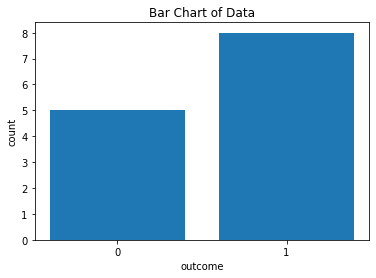

In [266]:
binomial_one.plot_bar()